### CNN MODEL

In [2]:
import os 
import cv2 
import warnings 
import numpy as np 
from PIL import Image 
import seaborn as sns 
from keras.utils import normalize 
from keras.models import Sequential 
from keras.callbacks import EarlyStopping 
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 



Dataset size is  (27558, 150, 150)
Label size is  (27558,)


(-0.5, 149.5, 149.5, -0.5)

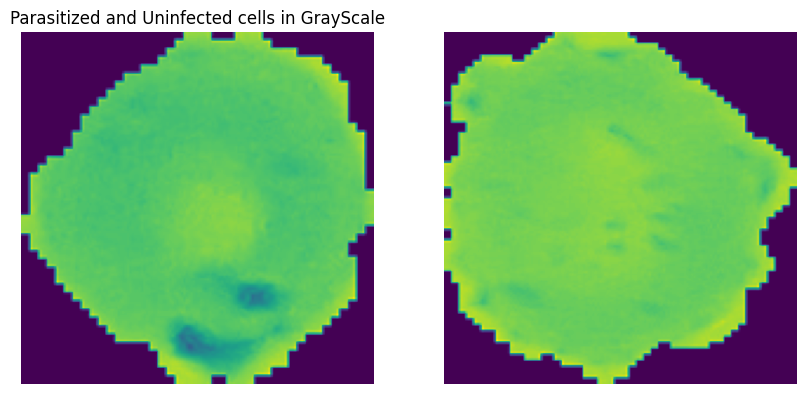

In [3]:

warnings.filterwarnings('ignore') 

img_dir= "Data/cell_images/" 
img_size= 150 
dataset = [] 
label = [] 

parasite_imgs = os.listdir(img_dir + "Parasitized/")
for i, img_name in enumerate(parasite_imgs):
    
    if (img_name.split('.')[1] == 'png'):
        img = cv2.imread(img_dir + 'Parasitized/' + img_name, cv2.IMREAD_GRAYSCALE) 
        img = Image.fromarray(img)
        img = img.resize((img_size, img_size))
        demo_imgP = img
        dataset.append(np.array(img))
        label.append(1)
        
        
uninfected_imgs = os.listdir(img_dir + "Uninfected/")
for i, img_name in enumerate(uninfected_imgs):
    
    if (img_name.split('.')[1] == 'png'):
        img = cv2.imread(img_dir + 'Uninfected/' + img_name, cv2.IMREAD_GRAYSCALE)
        img = Image.fromarray(img)
        img = img.resize((img_size, img_size))
        demo_imgU = img
        dataset.append(np.array(img))
        label.append(0)        
        
dataset = np.array(dataset) 
label = np.array(label)


print("Dataset size is ", dataset.shape)
print("Label size is ", label.shape)
demo_imgP=np.asarray(demo_imgP)
demo_imgU=np.asarray(demo_imgU)
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(demo_imgP)
plt.axis('off')
plt.title("Parasitized and Uninfected cells in GrayScale")
plt.subplot(1, 2, 2)
plt.imshow(demo_imgU)
plt.axis('off')


In [4]:

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 1234) 
print("Train size is ", X_train.shape)
print("Test size is ", X_test.shape)

X_train = normalize(X_train, axis=1) 
X_test = normalize(X_test, axis=1)

Train size is  (22046, 150, 150)
Test size is  (5512, 150, 150)


In [5]:
y_train.shape

(22046,)

In [6]:
input = (img_size, img_size,1) 


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation ='sigmoid'))
  
         
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 



callback = EarlyStopping(monitor='loss', patience=3) 

history = model.fit(X_train, y_train, batch_size = 50, validation_data=(X_test, y_test), verbose = 1, epochs = 20, callbacks=[callback])          
          


Epoch 1/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.5528 - loss: 0.6849 - val_accuracy: 0.7103 - val_loss: 0.5823
Epoch 2/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 230s 470ms/step - accuracy: 0.7940 - loss: 0.4342 - val_accuracy: 0.9365 - val_loss: 0.1751
Epoch 3/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 57s 128ms/step - accuracy: 0.9377 - loss: 0.1908 - val_accuracy: 0.9505 - val_loss: 0.1493
Epoch 4/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - accuracy: 0.9459 - loss: 0.1576 - val_accuracy: 0.9487 - val_loss: 0.1463
Epoch 5/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9521 - loss: 0.1452 - val_accuracy: 0.9459 - val_loss: 0.1547
Epoch 6/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.9564 - loss: 0.1347 - val_accuracy: 0.9483 - val_loss: 0.1516
Epoch 7/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.9565 - loss: 0.1313 - val_accuracy: 0.9490 - val_loss: 0.1519
Epoch 8/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.9605 - loss: 0.115

In [7]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,635,813 (13.87 MB)

 Trainable params: 1,211,937 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,423,876 (9.25 MB)

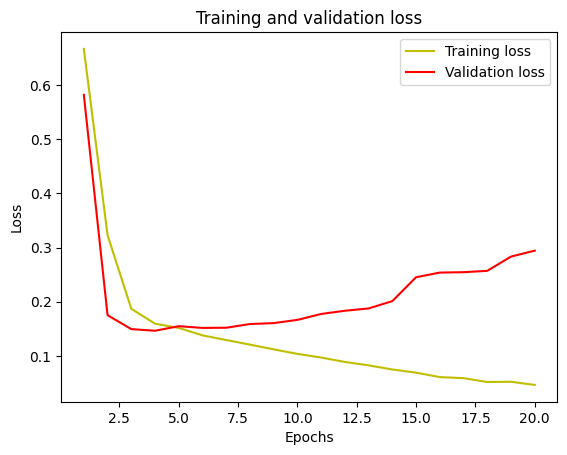

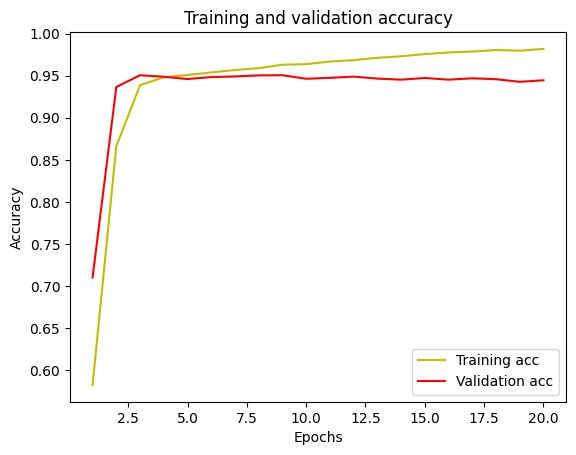

In [8]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [9]:
mythreshold=0.785 
y_pred_M1=(model.predict(X_test)>= mythreshold).astype(int) 
print(classification_report(y_test, y_pred_M1))

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2782
           1       0.97      0.90      0.94      2730

    accuracy                           0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



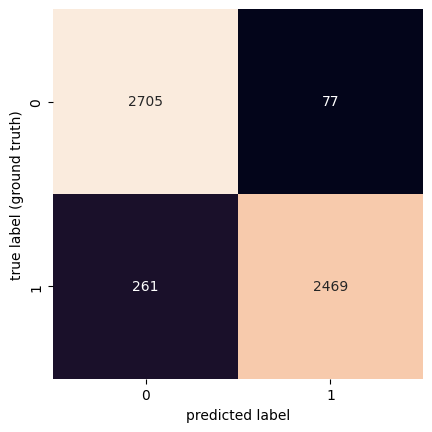

In [10]:
cm=confusion_matrix(y_test, y_pred_M1) 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label (ground truth)')
plt.show()

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


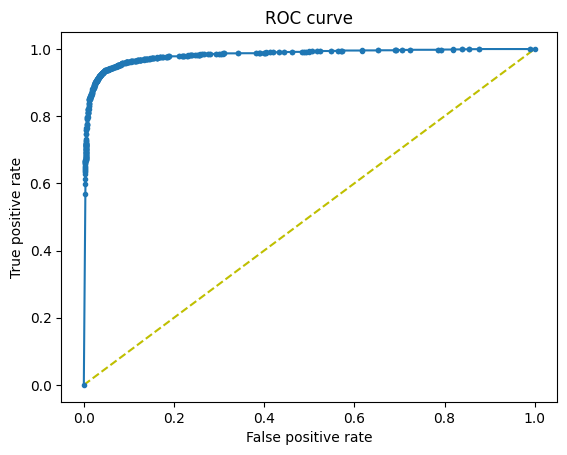

In [11]:
y_preds = model.predict(X_test).ravel() 

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [12]:
print( 'Precision is : %.2f%%' % (precision_score(y_test, y_pred_M1) * 100))


Precision is : 96.98%


In [13]:
print( 'Recall Score is : %.2f%%' % (recall_score(y_test, y_pred_M1) * 100))


Recall Score is : 90.44%


In [14]:
print( 'F1 Score is : %.2f%%' % (f1_score(y_test, y_pred_M1) * 100))


F1 Score is : 93.59%


###### An example of the model classifying the input image. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The prediction for this image is:  [[0.00463257]]
The actual label for this image is:  0


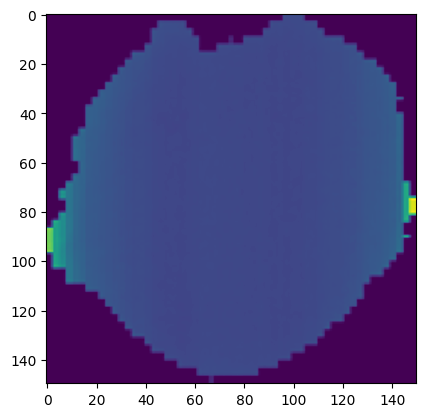

In [15]:
n=588  
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

### ANN MODEL

In [25]:
from keras.layers import Input
from keras.optimizers import Adam
model2 =  Sequential([
    
    Input(shape=(img_size, img_size,1)),
   
    
    Flatten(),
    
   
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),

    
    Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 22500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    11,520,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,695,617 (44.62 MB)

 Trainable params: 11,695,617 (44.62 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 



callback = EarlyStopping(monitor='loss', patience=3) 

history = model2.fit(X_train, y_train, batch_size = 50, validation_data=(X_test, y_test), verbose = 1, epochs = 20, callbacks=[callback])    

Epoch 1/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.5321 - loss: 0.7030 - val_accuracy: 0.5804 - val_loss: 0.6685
Epoch 2/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.5860 - loss: 0.6683 - val_accuracy: 0.5985 - val_loss: 0.6652
Epoch 3/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.5922 - loss: 0.6624 - val_accuracy: 0.6161 - val_loss: 0.6530
Epoch 4/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.6166 - loss: 0.6509 - val_accuracy: 0.6070 - val_loss: 0.6560
Epoch 5/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.6185 - loss: 0.6500 - val_accuracy: 0.6234 - val_loss: 0.6435
Epoch 6/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.6353 - loss: 0.6397 - val_accuracy: 0.6201 - val_loss: 0.6452
Epoch 7/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.6371 - loss: 0.6377 - val_accuracy: 0.6219 - val_loss: 0.6497
Epoch 8/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.6333 - loss: 0.6380 - 

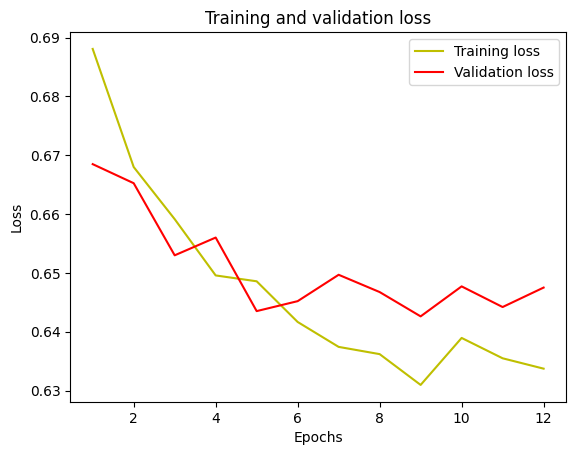

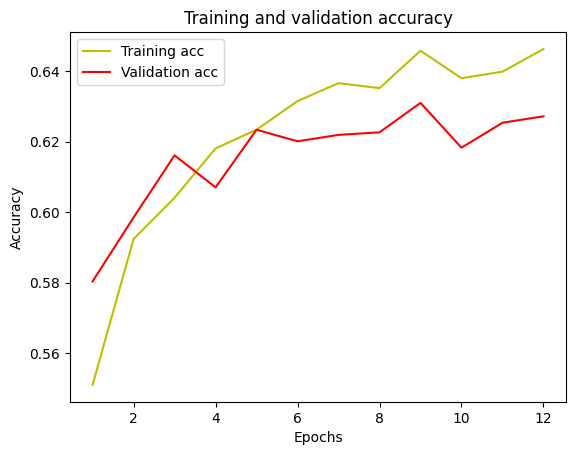

In [27]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [28]:
mythreshold=0.785 
y_pred_M1=(model2.predict(X_test)>= mythreshold).astype(int) 
print(classification_report(y_test, y_pred_M1))

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2782
           1       0.00      0.00      0.00      2730

    accuracy                           0.50      5512
   macro avg       0.25      0.50      0.34      5512
weighted avg       0.25      0.50      0.34      5512

